Adapted from Sergey Koposov

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# plot in serif font
plt.rcParams["font.family"] = "serif"
# make all plot labels bigger
plt.rcParams.update({'font.size': 17})

import pandas as pd

from astropy import coordinates
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import astropy.units as u

import astropy.table as atpy
import astropy.io.fits as pyfits

In [9]:
rmax = 40
rmax = 40
rmin = -20


sergev_path = '/global/cfs/cdirs/desi/users/koposov/dr1_plots/'
T = atpy.Table().read(sergev_path+'mws_figure_data1.fits', mask_invalid=True)
DD = pyfits.getdata(sergev_path+'mws_figure_data2.fits')
T = T[~np.isnan(T['feh'])]
# sort T 
T = T[np.argsort(np.abs((T['z'])))]

In [10]:
# custom rescaling for color mapping
def metal_color(f):
    fc = f + .6
    fc = ((fc / np.exp(.5*np.abs(fc))) + .8)
    return fc**.8

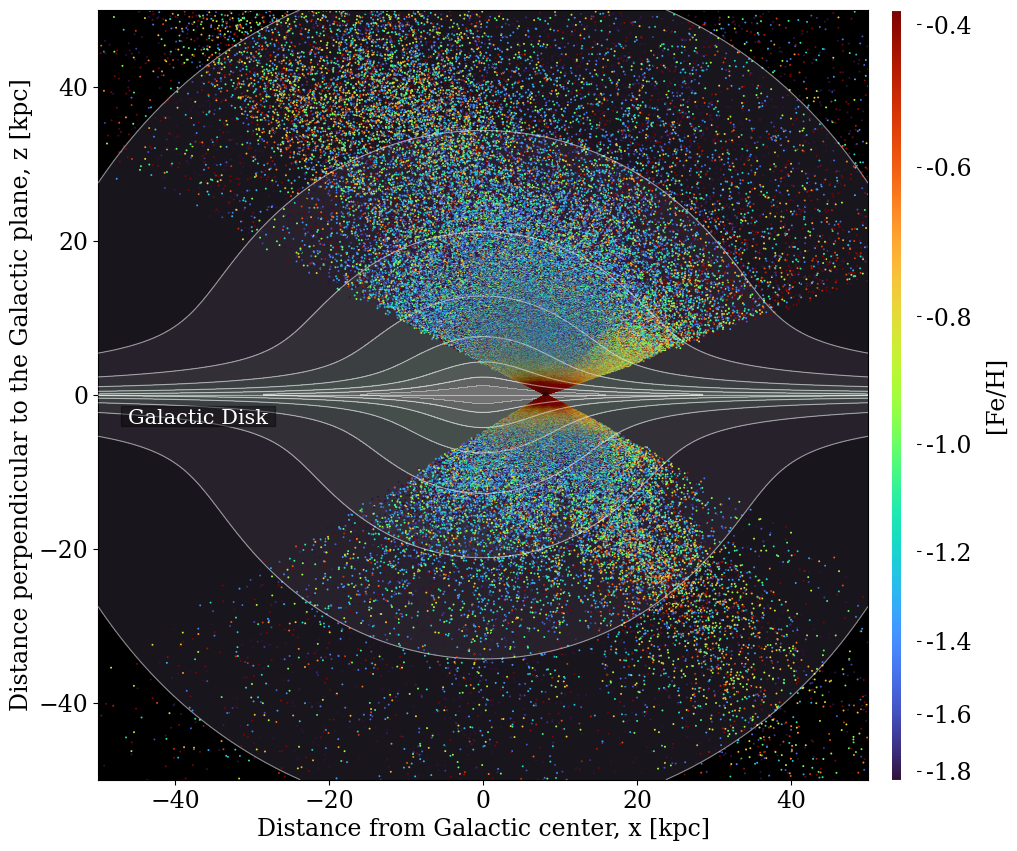

In [12]:
fig = plt.figure(1, figsize=(12,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('black')


# Milky Way contours
# ------------------
lim=50
plt.contour(np.log10(DD), extent=[-lim, 50, -50, 50], levels=[0, 1, 2, 3, 4, 5, 6],
                colors='white',
                alpha=.5, zorder=4, linewidths=.8)
plt.axhline(0, color='white', alpha=.5, zorder=1, linewidth=.8)
plt.contourf(np.log10(DD), extent=[-50, 50, -50, 50], levels=[0, 1, 2, 3, 4, 5, 6, 7],#, 8, 9, 10],
                cmap='pink', alpha=0.13, zorder=0)#, vmin=-1.5)
plt.contourf(np.log10(DD), extent=[-50, 50, -50, 50], levels=[0, 1, 2, 3, 4, 5, 6, 7],#, 8, 9, 10],
                cmap='bone', alpha=0.32, zorder=0, vmin=-1.5)
# make spot inside inner conour white
plt.contourf(np.log10(DD), extent=[-50, 50, -50, 50], levels=[7,10],
                cmap='binary', alpha=.45, zorder=0, vmin=np.max(np.log10(DD)));


# Plotting points
# ------------------
aind = (np.abs(T['z']) > -.1)  # option to make z cut

# making points in more dense regions more transparent
n_alpha_levels = 10
batch_size = len(T) // n_alpha_levels
alphas = np.logspace(-2, 0, n_alpha_levels)
for i in range(n_alpha_levels):
    start = i * batch_size
    end = (i + 1) * batch_size
    batch = T[start:end]
    plt.scatter(-batch['x'], batch['z'],c=metal_color(batch['feh']), s=2, alpha=alphas[i], cmap='turbo',
            edgecolor='none', zorder=2, norm=plt.Normalize(vmin = .2, vmax=1))

# Axis
# ------------------ 
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Distance from Galactic center, x [kpc]')
plt.ylabel('Distance perpendicular to the Galactic plane, z [kpc]')
color_bar = plt.colorbar(pad=0.01)
feh_marks = np.arange(-1.8, -.2, .2)
color_bar.set_ticks(metal_color(feh_marks))
color_bar.set_ticklabels([round(f, 2) for f in feh_marks])
# add label right below galactic plane
plt.text(-37, -3, 'Galactic Disk', color='white', ha='center', va='center', fontsize=15, zorder=5)
# add black rectangle behind for text visibility
plt.gca().add_patch(plt.Rectangle((-47, -4), 20, 2.5, edgecolor='black', facecolor='black', zorder=4, alpha=.4))

color_bar.ax.set_aspect(100)
color_bar.outline.set_edgecolor('white')
color_bar.set_label("[Fe/H]", labelpad=10)
#plt.savefig('figures/DESI_DR1_MW.png', dpi=300, bbox_inches='tight');